# POLYNOMIAL REGRESSION CODE

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Polynomial function 
def fun(x):
    y= 4*x**3 + 3*x**2 + 2*x + 1
    return y


In [3]:
#generating 100 values of x and y
m=500
y=[]
x=np.linspace(0.0, 1.0, num=m)
x=np.reshape(x,(m,1))
for i in range(0,m):
    y.append(fun(x[i])+random.uniform(0,2))
    

In [4]:
#rescaling y
y_max=np.max(y)
y_min=np.min(y)
for i in range(0,len(y)):
    y[i]=(y_max-y[i])/(y_max-y_min)


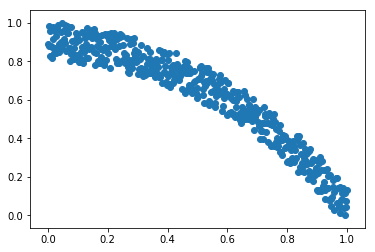

In [5]:
plt.scatter(x,y)    

In [6]:
#making arrays for x^2 x^3
x0=np.zeros((m,1))
x2=np.zeros((m,1))
x3=np.zeros((m,1))
for i in range(0,len(x)):
    x0[i]=1;
    x2[i]=float(x[i]*x[i])
    x3[i]=float(x[i]*x[i]*x[i])   

In [7]:
#generating random values for w0,w1,w2,w3
w0=random.uniform(0,1)  
w1=random.uniform(0,1)
w2=random.uniform(0,1)  
w3=random.uniform(0,1) 

In [8]:
w0,w1,w2,w3

(0.6034906197671374,
 0.8621485856790928,
 0.01115102473686036,
 0.5964746730821372)

In [9]:
#deciding initial values for error(err) and learning rate(alpha)
err=1
alpha=0.1
iteration=0

In [10]:
def sum1(y,x,x2,x3,w0,w1,w2,w3,m):
    sum0=0.0
    for i in range(0,m):
        n=y[i]-w0-w1*x[i]-w2*x2[i]-w3*x3[i]
        n=n*n
        sum0=sum0+n
    return sum0   

In [11]:
#creating an array for storing cost of cost function at each iteration
J=[]
#giving its first value
J.append(float((0.5/m)*sum1(y,x,x2,x3,w0,w1,w2,w3,m)))
#creating initial vectors for DJ
DJ0=np.zeros((m,1))
DJ1=np.zeros((m,1))
DJ2=np.zeros((m,1))
DJ3=np.zeros((m,1))
yh=np.zeros((m,1))

In [12]:
#training model through feedback modeling
while(err>1.e-6):
    for i in range(0,m):
        yh[i]=w0+w1*x[i]+w2*x2[i]+w3*x3[i]
    DJ0=(yh-y)
    DW0=-alpha*sum(DJ0)/m;
    for i in range(0,m):
        DJ1[i]=float((yh[i]-y[i])*x[i])
    DW1=-alpha*sum(DJ1)/m;
    for i in range(0,m):
        DJ2[i]=float((yh[i]-y[i])*x2[i])
    DW2=-alpha*sum(DJ2)/m;
    for i in range(0,m):
        DJ3[i]=float((yh[i]-y[i])*x3[i])
    DW3=-alpha*sum(DJ3)/m;
    w0=w0+DW0
    w1=w1+DW1
    w2=w2+DW2
    w3=w3+DW3
    iteration=iteration+1
    J.append(float((0.5/m)*sum1(y,x,x2,x3,w0,w1,w2,w3,m)))
    err=abs(J[iteration]-J[iteration-1])
    #print(err)

Text(0,0.5,'value of y --->')

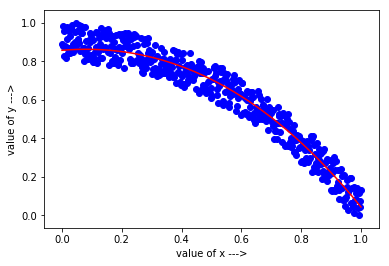

In [13]:
#plotting regression line on the graph
plt.scatter(x,y,color='BLUE')
plt.plot(x,yh,color='RED')  
plt.xlabel("value of x --->")
plt.ylabel("value of y --->")

Text(0,0.5,'decreasing Loss function')

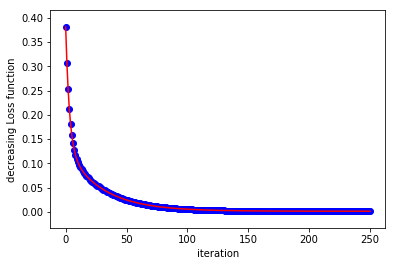

In [14]:
#plot of iteration vs reducing cost function
iteration=iteration+1
iteration1=[]  
for i in range(0,iteration):
    iteration1.append(i)
plt.scatter(iteration1,J,color='BLUE')
plt.plot(iteration1,J,color='RED')    
plt.xlabel("iteration")
plt.ylabel("decreasing Loss function")
    

In [233]:
#final weights
w0,w1,w2,w3

(array([0.95333761]),
 array([-0.3971423]),
 array([-0.10821696]),
 array([-0.32810401]))